In [1]:
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

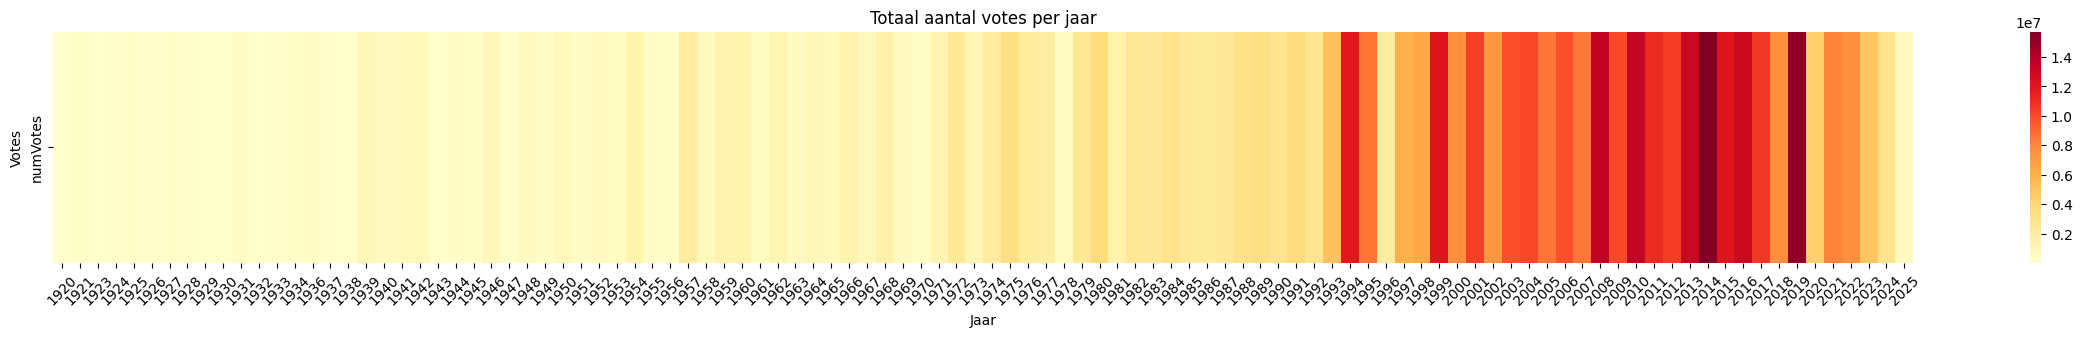

In [2]:
df = pd.read_csv("combined_votes_by_year.csv")

#voeg het totale aantal votes per jaar
votes_per_year = df.groupby('releaseYear')['numVotes'].sum().reset_index()

#lijst van alle jaren in de dataset
all_years = sorted(df['releaseYear'].unique())  # Sorteer de jaren

#Zorg dat de heatmap-data alle jaren bevat (zelfs als sommige geen votes hebben)
heatmap_data = votes_per_year.set_index('releaseYear').reindex(all_years).T.fillna(0)


plt.figure(figsize=(30, 3))
sns.heatmap(heatmap_data, fmt='.1f', cmap='YlOrRd', cbar=True, xticklabels=all_years)
plt.title('Totaal aantal votes per jaar')
plt.xlabel('Jaar')
plt.ylabel('Votes')
plt.xticks(rotation=45)
plt.show()